In [1]:
import pandas as pd
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import itertools
import glob
from scipy import stats

In [22]:
# Train Data = Min/Max/Mean/Std/Median/Entropy

path = r'/home/giang/Lab/Code/Testsets' # use your path
classes = {0:'P0-W0', 1:'P1-W1', 2:'P9-W7', 3:'P14-W0'}

df, x_np1,x_np2, y_np = {}, {}, {}, {}
x_np_all, y_np_all = np.empty((0,9)), np.empty((0))
window_size = 200
step = 100
temp = np.empty([1,window_size])
feature1, feature2 = {}, {}

for i, cls in classes.items():
    print(i, cls)
    all_files = glob.glob(path + "/" + cls + "/*.csv")
    df[i] = pd.concat((pd.read_csv(f, header=None) for f in all_files))
    x_np1[i] = np.transpose(np.array(df[i]))
    x_np2[i] = np.transpose(np.array(df[i]))
    print(x_np1[i].shape)
    x_np1[i] = x_np1[i].reshape(-1,56)
    x_np2[i] = x_np1[i].reshape(-1,56)
    print(x_np1[i].shape)
    print(x_np2[i].shape)
    
#    x_np1[i] = np.amax(np.real(np.fft.fft(x_np1[i], axis=0)),axis = 1)
#    x_np2[i] = np.amax(np.imag(np.fft.fft(x_np2[i], axis=0)),axis = 1)
    
    x_np1[i] = np.amin(x_np1[i], axis=1)    #Min Feature
    x_np2[i] = np.amax(x_np2[i], axis=1)    #Max Feature
#    x_np[i] = np.mean(x_np[i], axis=1)    #Mean Feature
#    x_np[i] = np.std(x_np[i], axis=1)     #Standard Deviation Feature
#    x_np[i] = np.var(x_np[i], axis=1)     # Variance Feature
#    x_np[i] = stats.moment(x_np[i],2, axis=1)   # 2nd order Moment Feature
#    x_np1[i] = stats.moment(x_np1[i],3, axis=1)   # 3rd order Moment Feature
#    x_np2[i] = stats.moment(x_np2[i],4, axis=1)   # 4th order Moment Feature
#    x_np[i] = stats.entropy(x_np[i], axis=1)     #Entropy Feature
    
    print(x_np1[i].shape)
    print(x_np2[i].shape)
    
    track1 = np.empty([x_np1[i].shape[0]//step+1,1])
    track2 = np.empty([x_np2[i].shape[0]//step+1,1])

    for j in range(0,x_np1[i].shape[0]-window_size+1,step):
        for k in range(window_size):
            temp[0,k] = x_np1[i][j+k]
        track1[j//step,0] = np.var(temp)
        
    feature1[i] = np.array(track1)
    print(feature1[i].shape)
    
    for j in range(0,x_np2[i].shape[0]-window_size+1,step):
        for k in range(window_size):
            temp[0,k] = x_np2[i][j+k]
        track2[j//step,0] = np.var(temp)
        
    feature2[i] = np.array(track2)
    print(feature2[i].shape)
    
#     print(x_np[i].shape)
#     x_np[i]=x_np[i].reshape(-1,9)
#     print(x_np[i].shape)
           
#     y_np[i] = np.ones(len(x_np[i])) * i # Target label

#     x_np_all = np.concatenate((x_np_all, x_np[i]), axis=0)
#     y_np_all = np.concatenate((y_np_all, y_np[i]), axis=0)

# print(x_np_all.shape, y_np_all.shape)

# # Visualize data sample
# plt.plot(x_np[0])
# plt.plot(x_np[1])
# plt.plot(x_np[2])
# plt.plot(x_np[3])
# plt.xlabel("Sample")
# plt.ylabel("4th moment")
# plt.show()


0 P0-W0
(861, 504)
(7749, 56)
(7749, 56)
(7749,)
(7749,)
(78, 1)
(78, 1)
1 P1-W1
(743, 504)
(6687, 56)
(6687, 56)
(6687,)
(6687,)
(67, 1)
(67, 1)
2 P9-W7
(819, 504)
(7371, 56)
(7371, 56)
(7371,)
(7371,)
(74, 1)
(74, 1)
3 P14-W0
(824, 504)
(7416, 56)
(7416, 56)
(7416,)
(7416,)
(75, 1)
(75, 1)


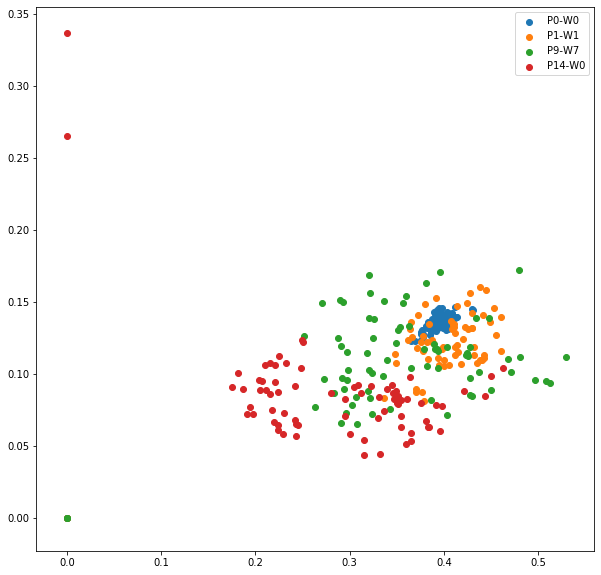

In [23]:
plt.figure(figsize = (10,10))
for i,cls in classes.items():
    plt.scatter(feature1[i],feature2[i],label = cls)
#plt.scatter(feature1[0],feature2[0],label = 'P0-W0')
#plt.scatter(feature1[1],feature2[1],label = 'P1-W1')
#plt.scatter(feature1[2],feature2[2],label = 'P9-W7')
#plt.scatter(feature1[3],feature2[3],label = 'P14-W0')
plt.legend(loc = 'best')
plt.show()